In [1]:
from load_data import LoadDataset

In [6]:
df = LoadDataset("./data/attack_transactions.csv")

In [7]:
df

,seed_event,group,timestamp,tx_hash,tx_status,from_addr,from_addr_type,to_addr,to_addr_type,method_name,method_hex,value,input,gas,gas_price,gas_used,nonce,stage,attack_type
0,0x39677e1c40ac89290b87173d4f28542816bd077d,hackergold,2017-01-03 20:32:15,0x879a8260d50509c4c4a2dccfbdac046864462f67b389a3eab0596c6f8eb5753a,0,0xb18626e852ab67e854fd6cc6f4d782a2f893a4c0,user,0x39677e1c40ac89290b87173d4f28542816bd077d,user,transfer,Unknown,0.01,0x,250000,2.600000e-08,21000,61,0,improper_authen
1,0x39677e1c40ac89290b87173d4f28542816bd077d,hackergold,2017-01-03 20:33:14,0x9f7bb17f3d16243c90d8d7bf26ea033eb714f3c6865ea43fea0a0a0480fcae3c,0,0xb18626e852ab67e854fd6cc6f4d782a2f893a4c0,user,0x39677e1c40ac89290b87173d4f28542816bd077d,user,transfer,Unknown,19.90,0x,250000,2.600000e-08,21000,62,0,improper_authen
2,0x39677e1c40ac89290b87173d4f28542816bd077d,hackergold,2017-01-03 20:36:58,0x1f07c40de0885bcd519c6ee73e20eb0d1d4925be9b77b21ac54538e34207ff40,0,0x32be343b94f860124dc4fee278fdcbd38c102d88,exchange,0x39677e1c40ac89290b87173d4f28542816bd077d,user,transfer,Unknown,59.99,0x,333333,3.000000e-08,21000,189281,0,improper_authen
3,0x0015f3c39221b20016cebdbf8b19eb5acedca901,hackergold,2017-01-03 21:13:45,0x2653879a6437ae763a1729821642217a5eeeff5a7db413e5fbe262aa9151582e,0,0x39677e1c40ac89290b87173d4f28542816bd077d,user,0x0015f3c39221b20016cebdbf8b19eb5acedca901,user,transfer,Unknown,0.20,0x,21000,2.222478e-08,21000,104,0,improper_authen
4,0x0015f3c39221b20016cebdbf8b19eb5acedca901,hackergold,2017-01-03 21:16:21,0xe607de18a0a0284f69acb756089937f2684015dd639c320824fff3c44fa3625d,0,0x0015f3c39221b20016cebdbf8b19eb5acedca901,user,0x373c55c277b866a69dc047cad488154ab9759466,contract,deposit(),0xd0e30db0,0.07,0xd0e30db0,250000,2.000000e-08,44454,0,0,improper_authen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29389,0x281017b4e914b79371d62518b17693b36c7a221e,rocketcoin-related-2,2018-11-10 11:46:45,0x60fed63e3666125eb195bcc3c64e055ed5675e1256a1096a7d6684490b68ed82,1,0x281017b4e914b79371d62518b17693b36c7a221e,user,0xc6c2a8f2c957806ac0580b46d84d2717291b9df1,contract,"multiTransfer(address[],uint256[])",0x1e89d545,0.00,0x1e89d545000000000000000000000000000000000000000000000000000000000000004000000000000000000000000000000000000000000000000000000000000000a0000000000000000000000000000000000000000000000000000000000000000200000000000000000000000075315b29bc16fc8276c52afe6bf100e9307422ca00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000002ffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffff000000000000000000000000000000000000000000000000000000000000012d,77777,4.100000e-08,27445,51,2,integer_over_under_flow
29390,0x281017b4e914b79371d62518b17693b36c7a221e,rocketcoin-related-2,2018-11-10 11:49:42,0x34c50e0b49b6d8b1c6f718698db24de6edd6ed2542e6c0c73295bf31fff3117a,1,0x281017b4e914b79371d62518b17693b36c7a221e,user,0xc6c2a8f2c957806ac0580b46d84d2717291b9df1,contract,"multiTransfer(address[],uint256[])",0x1e89d545,0.00,0x1e89d545000000000000000000000000000000000000000000000000000000000000004000000000000000000000000000000000000000000000000000000000000000a0000000000000000000000000000000000000000000000000000000000000000200000000000000000000000075315b29bc16fc8276c52afe6bf100e9307422ca000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000028000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000012d,77777,5.500000e-08,25461,52,2,integer_over_under_flow
29391,0x281017b4e914b79371d62518b17693b36c7a221e,rocketcoin-related-2,2018-11-10 12:11:47,0xf8ef465ccad65216cd46a9a52669933cea5540bfb7c4ee9063c5932080512986,1,0x281017b4e914b79371d62518b17693b36c7a221e,user,0xd24e56f02ee723a443575836b9668587ffd6204f,contract,"batchTransfer(address[],uint256)",0x83f12fec,0.00,0x83f12fec0000000000000000000000000000000000000000000000000000000000

In [4]:
df.columns

Index(['seed_event', 'group', 'timestamp', 'tx_hash', 'tx_status', 'from_addr',
       'from_addr_type', 'to_addr', 'to_addr_type', 'method_name',
       'method_hex', 'value', 'input', 'gas', 'gas_price', 'gas_used', 'nonce',
       'stage', 'attack_type'],
      dtype='object')

In [5]:
len(df.columns)

19

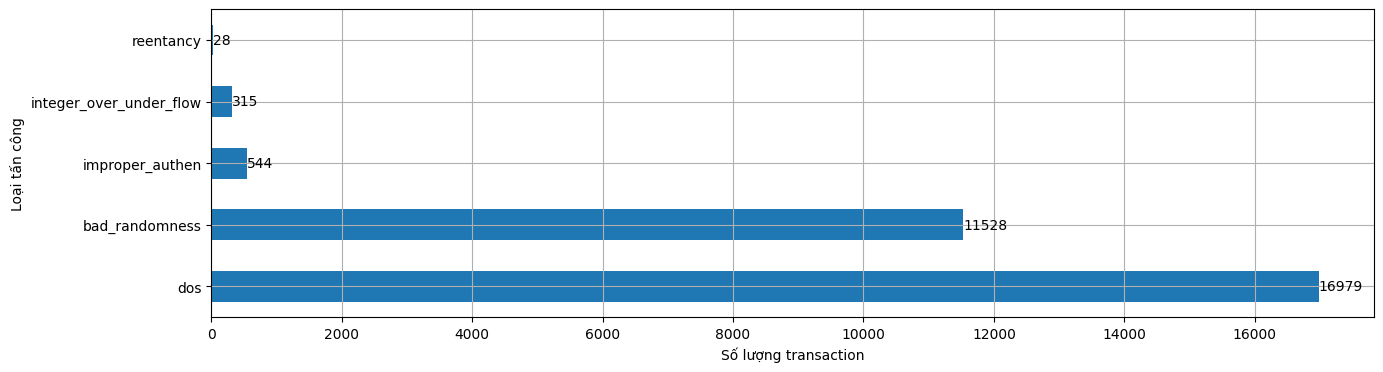

In [5]:
df.plotChart('attack_type',  "Số lượng transaction", "Loại tấn công", figsize = (15,4), top_n = 10, type = "horizontal")

In [7]:
dapp = LoadDataset("./data/dapp.csv")
dapp_dict = {}
for idx, row in dapp.iterrows():
    dapp_dict[row['gameAddress']] = row['gameName']
dapp_dict

{'0xa62142888aba8370742be823c1782d17a0389da1': 'fomo3d',
 '0xdd9fd6b6f8f7ea932997992bbe67eabb3e316f3c': 'lastwinner',
 '0x29488e24cfdaa52a0b837217926c0c0853db7962': 'supercard',
 '0x041b3eb05560ba2670def3cc5eec2aeef8e5d14b': 'cny_token',
 '0x27f706edde3ad952ef647dd67e24e38cd0803dd6': 'useless_ethereum_token',
 '0x8d12a197cb00d4747a1fe03395095ce2a5cc6819': 'beauty',
 '0x6fc9c554c2363805673f18b3a2b1912cce8bfb8a': 'xrc',
 '0x43ee79e379e7b78d871100ed696e803e7893b644': 'ugt',
 '0x24da016c06941ec2c92be28e0a2b2e679f0d1dc7': 'fomo_lightning',
 '0x05aa2fdf9f58b426b49900834cce0565d88e52eb': 'bingo4beast_long_official_(b4b)',
 '0x0ad3227eb47597b566ec138b3afd78cfea752de5': 'fomo_short',
 '0x60be37dacb94748a12208a7ff298f6112365e31f': 'smart',
 '0xca6378fcdf24ef34b4062dda9f1862ea59bafd4d': 'godgame',
 '0x86d179c28cceb120cd3f64930cf1820a88b77d60': 'fomogame',
 '0xc6725ae749677f21e4d8f85f41cfb6de49b9db29': 'bancor',
 '0x1f573d6fb3f13d689ff844b4ce37794d79a7ff1c': 'bnt',
 '0xa15c7ebe1f07caf6bff097d8a589

In [8]:
df['dapp_name'] = df['to_addr'].map(dapp_dict)

In [9]:
df.fillna("UNKNOWN CONTRACT", inplace=True)

In [10]:
a = df[df['method_name'] == "execute()"]

In [11]:
a['attack_type'].unique()

array(['bad_randomness'], dtype=object)

In [12]:
df['stage'].value_counts()

stage
2    15618
1    12810
0      510
3      456
Name: count, dtype: int64

In [13]:
df['attack_type'].value_counts()

attack_type
dos                        16979
bad_randomness             11528
improper_authen              544
integer_over_under_flow      315
reentancy                     28
Name: count, dtype: int64

In [14]:
df['stage'] = df['stage'] + 1

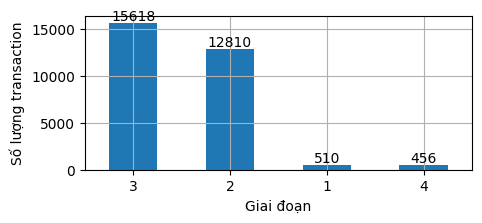

In [15]:
df.plotChart('stage', "Giai đoạn", "Số lượng transaction", figsize=(5, 2), top_n = 10)

In [16]:
df['stage']

0        1
1        1
2        1
3        1
4        1
        ..
29389    3
29390    3
29391    3
29392    3
29393    3
Name: stage, Length: 29394, dtype: int64

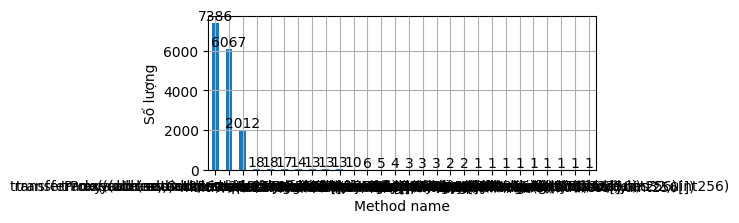

In [17]:
stage_0 = df[df['stage'] == 3]
stage_0 = LoadDataset(stage_0)
stage_0.plotChart("method_name", xlabel = "Method name", ylabel = "Số lượng", figsize = (5, 2))

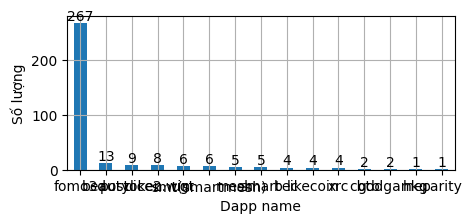

In [18]:
stage_0 = df[(df['stage'] == 1) & (df['dapp_name'] != "UNKNOWN CONTRACT")]
stage_0 = LoadDataset(stage_0)
stage_0.plotChart("dapp_name", xlabel = "Dapp name", ylabel = "Số lượng", figsize = (5, 2))

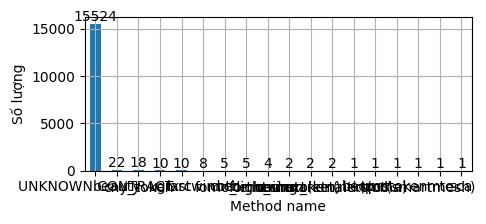

In [19]:
stage_0 = df[df['stage'] == 3]
stage_0 = LoadDataset(stage_0)
stage_0.plotChart("dapp_name", xlabel = "Method name", ylabel = "Số lượng", figsize = (5, 2))

In [35]:
seq_df = LoadDataset("./data/trace_attack.csv")

In [38]:
seq_df['stage'].value_counts()

stage
3    75
0    58
1    57
2    32
Name: count, dtype: int64

In [45]:
seq_df.shape

(222, 9)

In [78]:
import pandas as pd
group_ = seq_df.groupby(['stage'])
res = []

for stage, df_ in group_:
    if stage[0] == 3:
        res.append(df_.head(df_.shape[0] - 40))
    elif stage[0] == 0:
        res.append(df_.head(df_.shape[0] - 25))
    elif stage[0] == 1:
        res.append(df_.head(df_.shape[0] - 25))
    else:
        res.append(df_.head(df_.shape[0] - 15))
    
res_df = LoadDataset(pd.concat(res))
print(res_df.shape)

(117, 9)


In [79]:
res_df['stage'].value_counts()

stage
3    35
0    33
1    32
2    17
Name: count, dtype: int64

In [80]:
res_df['stage'] = res_df['stage'] + 1

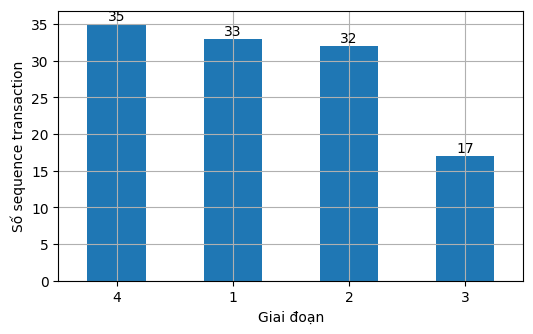

In [81]:
res_df.plotChart('stage', "Giai đoạn", "Số sequence transaction", figsize = (6,3.5))